# MSBC5180 HW1 Coding Part

### Solution by: *Anne Pierce* 

## What to Hand In
You will turn in a completed notebook on Canvas as a ipynb file. Your submission should be contained in a single Jupyter notebook named `hw1-firtname-lastname.ipynb`, where `firstname` and `lastname` are replaced with your first and last names. This will include your code as well as figures and answers to questions. Please create headers for your cells that are labeled “Deliverable” followed by the problem number, so that your responses are easy to find.

## The Associated Quiz
You will complete the associated quiz for HW1 on Canvas. The quiz is name **"Quiz HW1 "**.

## Collaboration policies
You are allowed to work with up to 3 people besides yourself. You are still expected to write up your own solution. Each individual must turn in their own submission, and list your collaborators after your name.

## Asking for Help
You are encouraged to ask questions on the Zoom channel. Do not post anything that you are turning in. In this assignment, that would be any of the plots you need to hand in, or the parameter values. However, you can describe your results, like the number of iterations it took to converge, and general things you observe about the algorithms.
You may ask questions to help with debugging, but do not post your code in a way of giving away solution. You can share error messages and describe what you are trying to do with your code, but try not to write enough to “give away” the solution.


# Read and understand the code
# Implementing a perceptron learning algorithm in Python

The code below shows an implementation of a perceptron classifier in Python. Take a minute to read over the code and understand what it is saying.

In [1]:
import numpy as np


def Perceptron(eta, n_iter, random_state, X, y):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
  
    """Fit training data.

    Parameters
    ----------
    X : {array-like}, shape = [n_examples, n_features]
      Training vectors, where n_examples is the number of examples and
      n_features is the number of features.
    y : array-like, shape = [n_examples]
      Target values.

    Returns
    -------
    self : object

    """
    """Initialize the w"""
    rgen = np.random.RandomState(random_state)
    w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    errors_ = []

    "Learning Perceptron"
    for _ in range(n_iter):
        errors = 0
        for xi, target in zip(X, y):
            "Updating weights (w and b)"
            "b is treated as the first element in w (w_[0])"
            if np.dot(xi, w_[1:]) + w_[0]>=0: #making prediction based on decision function
                yhat = 1
            else:
                yhat = -1
            update = eta * (target - yhat) #calculate the update 
            w_[1:] = w_[1:] + update * xi #update w
            w_[0] = w_[0] + update #update b bias
            errors =  errors + int(update != 0.0) #tracking the number of errors in this iteration
        errors_.append(errors) #tracking the number of errors overall
    return w_, errors_
    
"predict function rewritten"
def classifier_predict(X, w_):            
    "this part makes prediction for one data point: X is one instance (vector)"
    if len(X.shape) == 1:
        if np.dot(X, w_[1:]) + w_[0]>=0: #making prediction based on decision function
            yhat = 1
        else:
            yhat = -1
        "this part makes prediction for more than one data point: X has more than one instance (matrix)"
    else: 
        yhat = np.empty(X.shape[0]) #initialize an array with the same number of the observation in X
        for i, x in enumerate(X):
            if np.dot(x, w_[1:]) + w_[0]>=0: #making prediction based on decision function
                yhat[i]= 1
            else:
                yhat[i] = -1
    return yhat

## Training a perceptron model on the Iris dataset

In [2]:
import os
import pandas as pd


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df.columns = ['sepal_len', 'sepal_width', 'petal_len', 'petal_width', 'class']

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,sepal_len,sepal_width,petal_len,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Plotting the Iris data

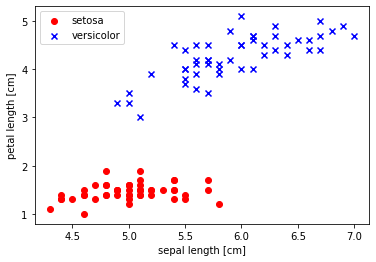

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100][["sepal_len", "petal_len"]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

### Training the perceptron model

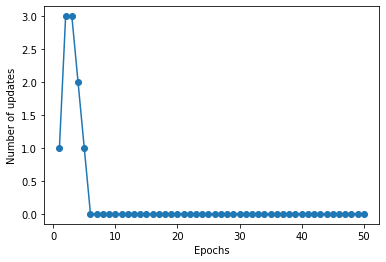

In [4]:
# set eta=0.1, n_iter=50, random_state=1
# train a Perceptron
w, errors = Perceptron(0.1, 50, 1, X, y)
"Plot the number of errors over time"
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

<br>
<br>

### A function for plotting decision regions

In [5]:
from matplotlib.colors import ListedColormap


"The function used for plot the decision regions."
"Not need to understand each line just use this function by changing its arguments"
def plot_decision_regions(X, y, w, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier_predict(np.array([xx1.ravel(), xx2.ravel()]).T, w)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

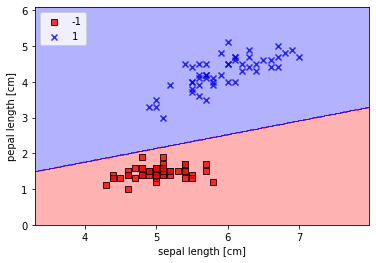

In [6]:
# set eta=0.1, n_iter=1000, random_state=1
# train a Perceptron

w, errors = Perceptron(0.1, 1000, 1, X, y)

# plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
# plt.xlabel('Epochs')
# plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
# plt.show()
plot_decision_regions(X, y, w)
plt.xlabel('sepal length [cm]')
plt.ylabel('pepal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

In [7]:
w

array([-0.38375655, -0.70611756,  1.83471828])

# Experimenting with Perceptron
The code above uses two variables, sepal length and petal length. This is not actually a very interesting example, because the points are completely separated by only one of these dimensions (petal length), so it is easy to learn. In other words, if you only used this one feature, you could still learn a classifier, rather than needing two features.

- A more interesting example is with **sepal length** and **sepal width**. The data are still linearly separable in these two dimensions, but it requires a combination of both variables. Modify the code to use these two variables. 

- Initialize the weights ${\bf w}$ to $0.0$. This can be done in `numpy` with `np.zeros`. When you run it, you will find that the algorithm still makes errors after the default 10 iterations (also called epochs).


# Deliverable 1


In [8]:
def Perceptron_zero(eta, n_iter, X, y):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    weight_init_ : int
      weight initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
  
    """Fit training data.

    Parameters
    ----------
    X : {array-like}, shape = [n_examples, n_features]
      Training vectors, where n_examples is the number of examples and
      n_features is the number of features.
    y : array-like, shape = [n_examples]
      Target values.

    Returns
    -------
    self : object

    """
    """Initialize the w"""
    
    w_ = np.zeros(1+X.shape[1])
    errors_ = []

    "Learning Perceptron"
    for _ in range(n_iter):
        errors = 0
        for xi, target in zip(X, y):
            "Updating weights (w and b)"
            "b is treated as the first element in w (w_[0])"
            if np.dot(xi, w_[1:]) + w_[0]>=0: #making prediction based on decision function
                yhat = 1
            else:
                yhat = -1
            update = eta * (target - yhat) #calculate the update 
            w_[1:] = w_[1:] + update * xi #update w
            w_[0] = w_[0] + update #update b bias
            errors =  errors + int(update != 0.0) #tracking the number of errors in this iteration
        errors_.append(errors) #tracking the number of errors overall
    return w_, errors_

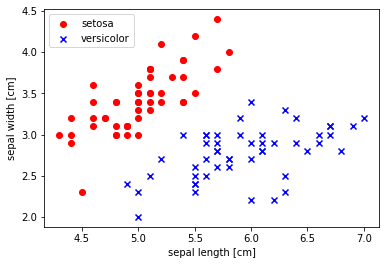

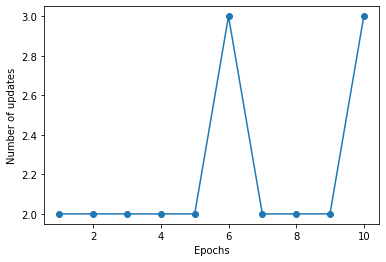

In [9]:
# extract sepal length and petal length
X = df.iloc[0:100][["sepal_len", "sepal_width"]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

# set eta=0.1, n_iter=10, weight initialized = 0
# train a Perceptron
w, errors = Perceptron_zero(0.1, 10, X, y)
"Plot the number of errors over time"
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

- Change the `n` iters parameter of the `Perceptron` object to `1000`. You will see that eventually perceptron learns to classify all of the instances correctly, but that it takes a large number of iterations.

# Deliverable 2

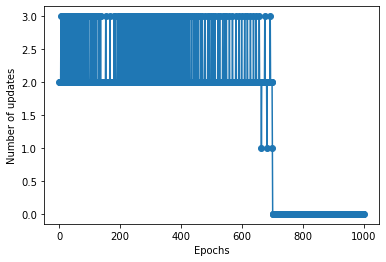

In [26]:
# set eta=0.1, n_iter=1000, weight initialized = 0
# train a Perceptron
w, errors = Perceptron_zero(0.1, 1000, X, y)
"Plot the number of errors over time"
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

- Examine the figure of decision regions (the figure with two regions shaded as red or blue) when running perceptron for `10, 20, 50, 100, 200, 500,` and `1000` iterations (seven different figures). You can see how the boundary changes and gradually becomes more accurate as the algorithm runs for more iterations.

- In your figures, be sure to change the axis labels to reflect the correct variable name (sepal width instead of pedal length).


# Deliverable 3

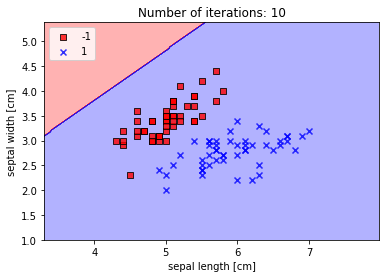

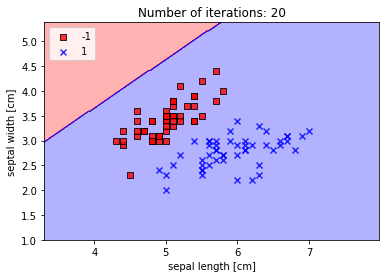

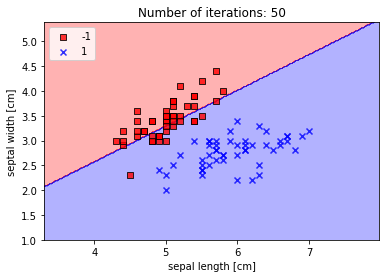

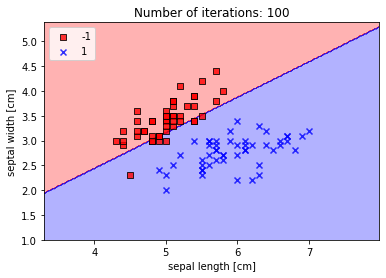

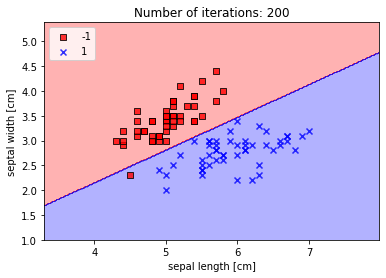

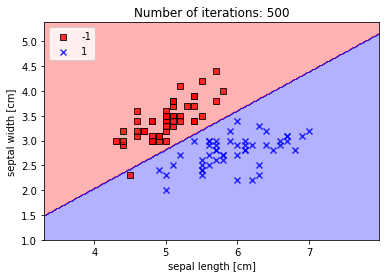

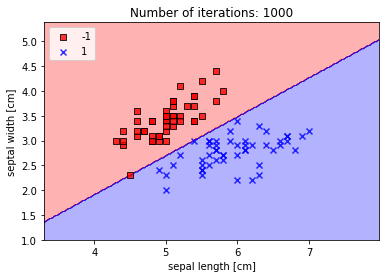

In [27]:
iteration_no = [10,20,50,100,200,500,1000]
for i in iteration_no:
    w, errors = Perceptron_zero(0.1, i, X, y)
    plot_decision_regions(X, y, w)
    plt.title(f'Number of iterations: {i}')
    plt.xlabel('sepal length [cm]')
    plt.ylabel('septal width [cm]')
    plt.legend(loc='upper left')


    # plt.savefig('images/02_08.png', dpi=300)
    plt.show()

- Finally, examine the weights that are learned by perceptron after `1000` iterations. To do this, print out the values of the w variable of the Perceptron object, which is the weight vector, where `w_[0]` is the ‘bias’ weight.


# Deliverable 4

In [13]:
# 1000 iterations 
w, errors = Perceptron_zero(0.1, 1000, X, y)
print('This is the weight vector')
print(w)
print('This is the bias')
print(w[0])

This is the weight vector
[-24.8   15.8  -20.14]
This is the bias
-24.799999999999944


# Modifying Perceptron

You will experiment with an algorithm that is similar to perceptron, called **Winnow**.
Winnow is not a commonly used algorithm (and it's not quite appropriate for this dataset), but implementing it is a way to get additional practice with the perceptron implementation here.

Like perceptron, Winnow (at least the basic version) is used for binary classification, where the positive class is predicted if:

$$\bf{w}^T \bf{x} >= \tau$$

for some threshold $\tau$.
This is almost the same as the perceptron prediction function, except that in perceptron, the threshold $\tau$ for positive classification is usually 0,
while it must be positive in Winnow. Usually $\tau$ is set to the number of training instances in Winnow. In this assignment, you'll set $\tau=100.0$.

The main difference between Winnow and Perceptron is how the weights are updated. Perceptron uses additive updates while Winnow uses multiplicative updates.
The Winnow update rule is:

$$w_i^{(\textrm{new})} = \begin{cases} 
      w_i \times \eta x_i & y_i > f(x_i) \\
      w_i \div \eta x_i & y_i < f(x_i) \\
      w_i & y_i = f(x_i) 
   \end{cases}$$
   
For this problem, you should create a new class called `Winnow`, which is similar to the `Perceptron` class but with the following changes:

- Initialize the weights ${\bf w}$ to $1.0$ instead of $0.0$. This can be done in `numpy` with `np.ones` (where the current code uses `np.zeros`).
- Change the prediction function so that it outputs the positive class if the linear function is greater than or equal to $100.0$ (where the current code uses a threshold of $0.0$).
- Change the update rule so that the weights are multiplied by $\eta x_i$ if the prediction was an underestimate, and divided by $\eta x_i$ if the prediction was an overestimate (where the current code adds $\eta x_i$ to the weight if it was an underestimate and subtracts $\eta x_i$ if it was an overestimate).


When you run this, use the variables `sepal length` and `petal length` (columns 1 and 3).
(The algorithm won't work if you use  `sepal length` and `sepal width`, for reasons we won't get into.) 

In the code, set the parameter `eta` to $1.0$ (it won't behave as expected if $\eta < 1$, which is the default, so you need to change it),
and set `n_iters` to $10$.

You may notice that when $\eta$ (eta) is 1, the bias weight will never change. This is okay; the algorithm will still work, but the bias won't contribute anything to the prediction rule.

If you run everything correctly, it should converge after 5 epochs.

# Deliverable 5

Answer the following items:

- The plot showing the number of updates versus epochs when using 10 iterations.


# Deliverable 5

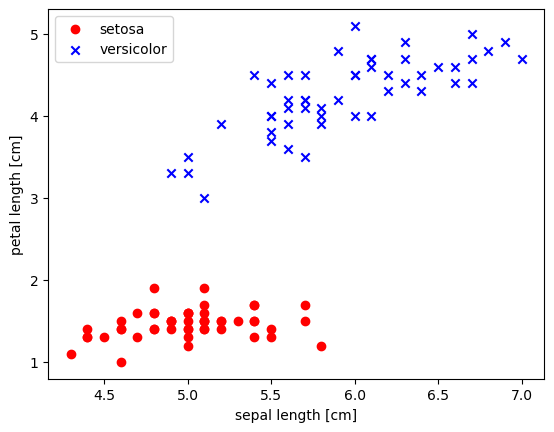

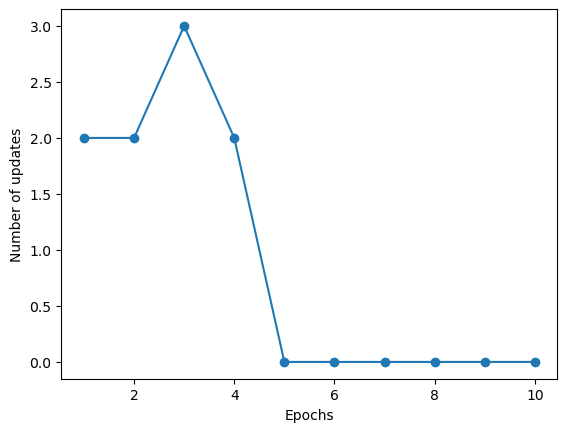

In [14]:

def Winnow_one(eta, n_iter, X, y):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (1.0)
    n_iter : int
      Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
  
    """Fit training data.

    Parameters
    ----------
    X : {array-like}, shape = [n_examples, n_features]
      Training vectors, where n_examples is the number of examples and
      n_features is the number of features.
    y : array-like, shape = [n_examples]
      Target values.

    Returns
    -------
    self : object

    """
    """Initialize the w"""

    w_ = np.ones(1+X.shape[1])
    errors_ = []

    "Learning Winnow_one"
    for _ in range(n_iter):
        errors = 0
        for xi, target in zip(X, y):
            "Updating weights (w and b)"
            "b is treated as the first element in w (w_[0])"
            if np.dot(xi, w_[1:]) + w_[0]>=100: #making prediction based on decision function
                yhat = 1
            else:
                yhat = -1
            update = eta * (target - yhat) #calculate the update 
            if target > yhat:
                w_[1:] = w_[1:] * eta * xi #update w
                w_[0] = w_[0] * eta #update b bias
            if target < yhat:
                w_[1:] = w_[1:] /(eta * xi) #update w
                w_[0] = w_[0] /eta #update b bias
            errors =  errors + int(update != 0.0) #tracking the number of errors in this iteration
        errors_.append(errors) #tracking the number of errors overall
    return w_, errors_


# extract sepal length and petal length
X = df.iloc[0:100][["sepal_len", "petal_len"]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

# set eta=1, n_iter=10, random_state=1
# train a Perceptron
w, errors = Winnow_one(1, 10, X, y)
"Plot the number of errors over time"
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

- The region boundary figure.

# Deliverable 6

/var/folders/9x/brj9g4ln5zg0_xwvfm64rgfc0000gq/T/ipykernel_35736/3121840018.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


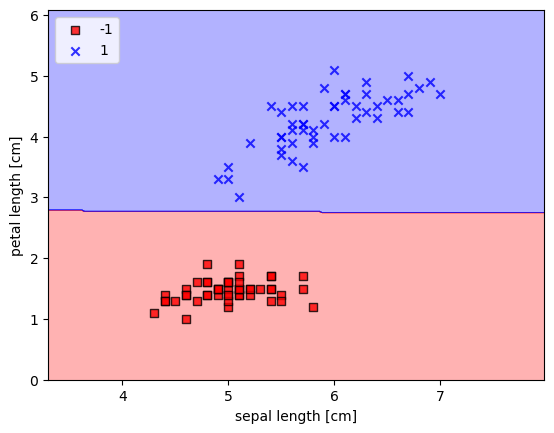

In [15]:
"use this classifier_predict for Winnow for decision region plot"
"predict function rewritten for Winnow"
def classifier_predict(X, w_):            
    "this part makes prediction for one data point: X is one instance (vector)"
    if len(X.shape) == 1:
        if np.dot(X, w_[1:]) + w_[0]>=100: #making prediction based on decision function
            yhat = 1
        else:
            yhat = -1
        "this part makes prediction for more than one data point: X has more than one instance (matrix)"
    else: 
        yhat = np.empty(X.shape[0]) #initialize an array with the same number of the observation in X
        for i, x in enumerate(X):
            if np.dot(x, w_[1:]) + w_[0]>=100: #making prediction based on decision function
                yhat[i]= 1
            else:
                yhat[i] = -1
    return yhat


#w, errors = Winnow_one(1, 10, X, y)
plot_decision_regions(X, y, w)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Deliverable 7

In [17]:

yhat = classifier_predict(X, w)
print(yhat)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [18]:
print('This is the weight vector')
print(w)

This is the weight vector
[ 1.          0.31213232 35.20483824]


- Write the linear function that is learned, in the form $m_1 x_1 + m_2 x_2 + b$.

# Deliverable 8

In [233]:
print("This is the learned linear function")
print('0.31213232x1 + 35.20483824x2 + 1')

This is the learned linear function
0.31213232x1 + 35.20483824x2 + 1
